## Opening of an Image

In [1]:
import cv2
print(cv2.__version__)


4.9.0


In [2]:
import cv2
from matplotlib import pyplot as plt
image_file = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\ocr.jpg"
img = cv2.imread(image_file)

In [3]:
#OPENING AN IMAGE
#https://stackoverflow.com/questions/28816046/displaying-different-images-with-actual-size-in-matplotlib-subplot
import numpy as np
import matplotlib.pyplot as plt

class QuadNode:
    def __init__(self, image):
        self.image = image
        self.children = [None, None, None, None]
        self.mean_value = np.mean(image)

def build_quadtree(image, max_depth=4):
    height, width, _ = image.shape
    root = QuadNode(image)
    stack = [(root, 0, 0, width, height)]  # (node, x, y, w, h)

    while stack:
        node, x, y, w, h = stack.pop()
        if w <= 1 or h <= 1 or max_depth == 0:
            continue

        subimages = [
            image[y:y + h // 2, x:x + w // 2],
            image[y:y + h // 2, x + w // 2:x + w],
            image[y + h // 2:y + h, x:x + w // 2],
            image[y + h // 2:y + h, x + w // 2:x + w]
        ]
        for i, subimage in enumerate(subimages):
            child = QuadNode(subimage)
            node.children[i] = child
            stack.append((child, x + (i % 2) * (w // 2), y + (i // 2) * (h // 2), w // 2, h // 2))

    return root

def plot_quadtree(node, ax, x, y, w, h):
    if all(child is None for child in node.children):
        ax.add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='gray'))
    else:
        for i, child in enumerate(node.children):
            if child is not None:
                plot_quadtree(child, ax, x + (i % 2) * (w // 2), y + (i // 2) * (h // 2), w // 2, h // 2)

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, _ = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig, ax = plt.subplots(figsize=figsize)

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Build quadtree and plot
    quadtree_root = build_quadtree(im_data)
    plot_quadtree(quadtree_root, ax, 0, 0, width, height)

    plt.show()

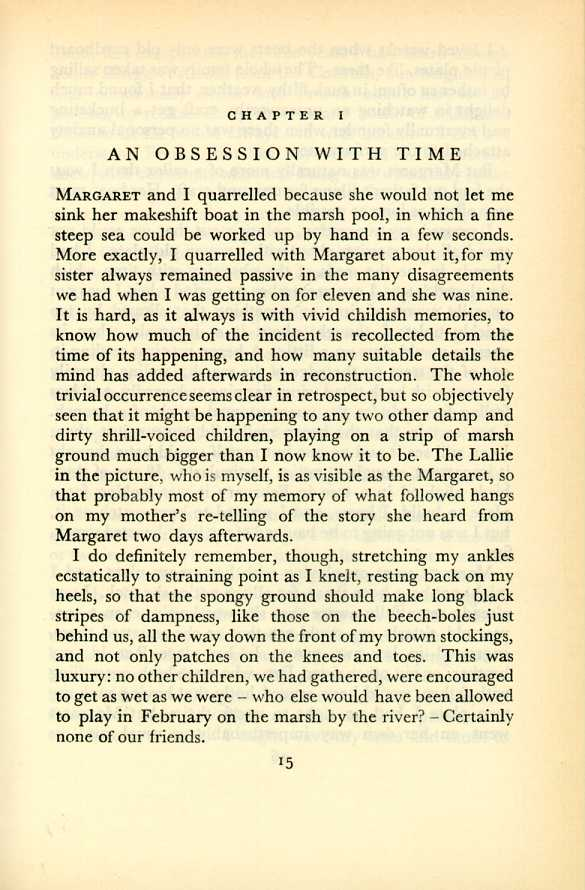

In [4]:
from IPython.display import display, Image

# Correctly formatted file path
image_file = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\image_file.jpg"

# Display the image
display(Image(filename=image_file))

## Inversion of the Image

In [5]:
import cv2

# Load an image
img = cv2.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\image_file.jpg")

# Invert the image
inverted_image = cv2.bitwise_not(img)

# Save the inverted image
cv2.imwrite("C:/Users/B A DHIVYA DHARUNA/OneDrive/Desktop/Invert.bmp", inverted_image)

True

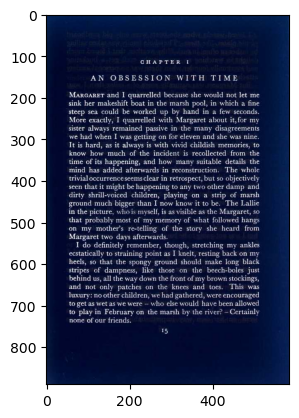

In [6]:
import matplotlib.pyplot as plt

# Display the image from a file
plt.imshow(plt.imread("C:/Users/B A DHIVYA DHARUNA/OneDrive/Desktop/Invert.bmp"))
plt.show()

## Binarization

In [7]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [8]:
gray_image = grayscale(img)
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\gs.bmp", gray_image)

True

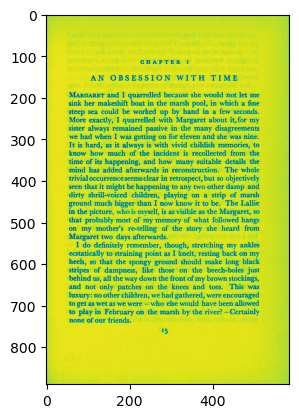

In [9]:
import matplotlib.pyplot as plt

# Display the grayscale image from a file
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\gs.bmp"))
plt.show()

### Adjusting the threshold of the Image

In [10]:
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\black_white.bmp", im_bw)

True

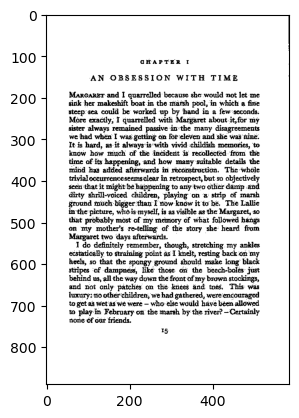

In [11]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\black_white.bmp"), cmap='gray')
plt.show()

## Noise Removal

In [12]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [13]:
no_noise = noise_removal(im_bw)
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp", no_noise)

True

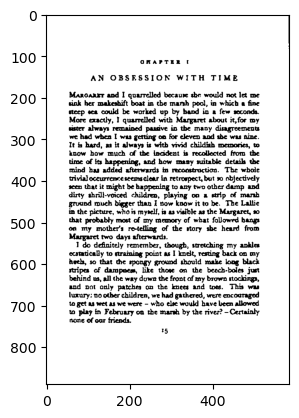

In [14]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"), cmap='gray')
plt.show()

## Dilation and Erosion

### Thinning of the font

In [15]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [16]:
eroded_image = thin_font(no_noise)
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\ei.bmp", eroded_image)

True

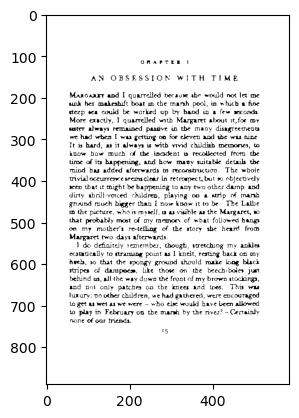

In [17]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\ei.bmp"), cmap='gray')
plt.show()

### Thickening of the font

In [18]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [19]:
dilated_image = thick_font(no_noise)
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\di.bmp", dilated_image)

True

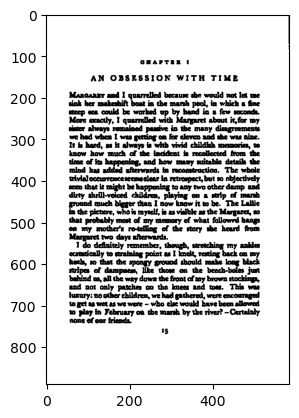

In [20]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\di.bmp"), cmap='gray')
plt.show()

## Border Removal

In [21]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

In [22]:
no_borders = remove_borders(no_noise)
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\nb.bmp", no_borders)

True

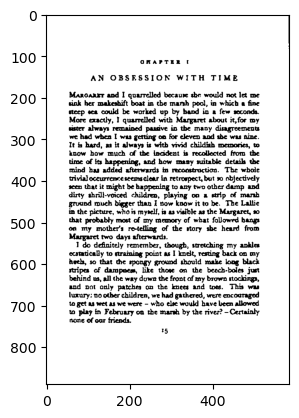

In [23]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\nb.bmp"), cmap='gray')
plt.show()

## Missing Borders

In [24]:
color = [255, 255, 255]
top, bottom, left, right = [150]*4

In [25]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\wb.bmp", image_with_border)

True

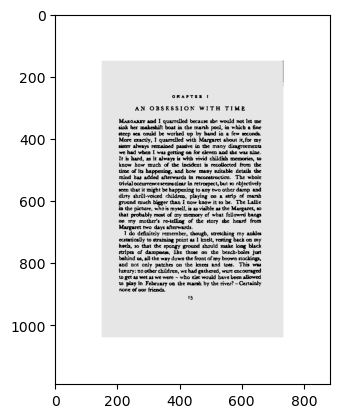

In [26]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNa\\OneDrive\\Desktop\\wb.bmp"), cmap='gray')
plt.show()


## Noise Removal (Drawing Contours)

In [27]:
def remove_borders(img):
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
    cnt = cntsSorted[-1]
    print (len(contours))
    x,y,w,h = cv2.boundingRect(cnt)
    crop = img[y:y+h,x:x+w]
    return (crop)

In [28]:
no_borders = remove_borders(no_noise)
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\nb.bmp", no_borders)

1


True

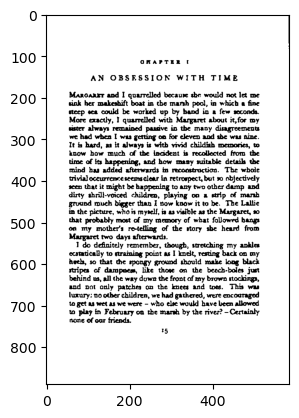

In [29]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\nb.bmp"), cmap='gray')
plt.show()

## Addition of a white border

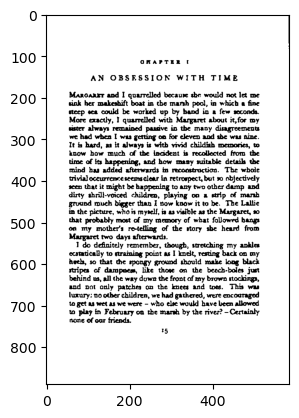

In [ ]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\nb.bmp"), cmap='gray')
plt.show()

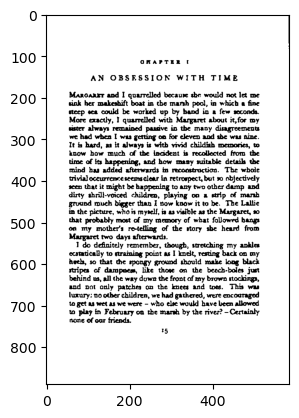

In [ ]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\nb.bmp"), cmap='gray')
plt.show()

In [30]:
color = [255, 255, 255] # 'cause purple!

# border widths; I set them all to 150
top, bottom, left, right = [150]*4

img_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)


In [31]:
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\iwb.bmp", img_with_border)

True

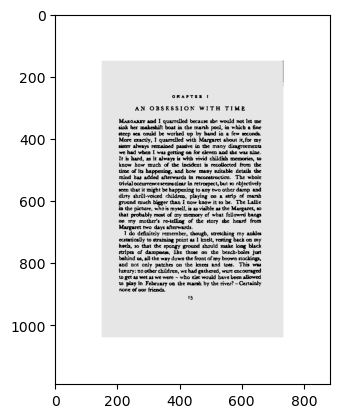

In [32]:
import matplotlib.pyplot as plt

# Display the image in grayscale
plt.imshow(plt.imread(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\iwb.bmp"), cmap='gray')
plt.show()

In [ ]:
cv2.imwrite(r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\iwb.bmp", img_with_border)

True

## Image - Text

In [33]:
import pytesseract
from PIL import Image

In [34]:
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

In [35]:
import cv2
import matplotlib.pyplot as plt

In [36]:
# Path to your original image file
image_path = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"

In [37]:
# Read the original image
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [38]:
img_file = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"

In [39]:
img = Image.open(img_file)

In [40]:
text = pytesseract.image_to_string(img)

In [41]:
print(text)

ORAPTER ¢
AN OBSESSION WITH TIME

Mazoaasr and I quarrelled because she would not let me
sink her makeshift boat in the marsh pool, in which a fine
meep ca could be worked up by hand in a few seconds.
More exactly, I quarrelled with Margaret about it,for my
tister always remained passive in the many disagreements
we hed when I was getting on for eleven and she was nine.
Tt is hard, 2a it always is witb vivid childish memories, to
know how much of the incident is recollected from the
time of its happening, and bow many suitable details the
mind has added afterwards in reconstruction, The whole
trivial occurrence seems clear in retrospect, but 90 objectively
seen that it might be happening to any two other damp and
dirty ahrill-voiced children, playing on a strip of marsh
ground much bigger than I tow know it to be. The Lallie
im the picture, whois mypelf, is as visible as the Margaret, 20
that probably most of my memory of what followed bangs
oa my mother’s re-telling of the story she h

## Text to Speech

In [42]:
import pyttsx3
from docx import Document

In [43]:
# Initialize the text-to-speech engine
engine = pyttsx3.init()

In [44]:
doc = Document()

In [45]:
paragraph = doc.add_paragraph(text)

In [46]:
paragraph_text = paragraph.text

In [47]:
# Use the text-to-speech engine to read the text out loud
engine.say(paragraph_text)
engine.runAndWait()

In [55]:
import cv2
import pytesseract
from spellchecker import SpellChecker

# Load the preprocessed image
image_path = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform OCR using PyTesseract
text = pytesseract.image_to_string(image)

# Create a spell checker object
spell = SpellChecker()

# Find misspelled words
misspelled = spell.unknown(text.split())

# Correct the misspelled words
for word in misspelled:
    correction = spell.correction(word)
    if correction is not None:
        text = text.replace(word, correction)

print(text)

import pyttsx3
from docx import Document

# Initialize the text-to-speech engine
engine = pyttsx3.init()

doc = Document()

paragraph = doc.add_paragraph(text)

paragraph_text = paragraph.text

# Use the text-to-speech engine to read the text out loud
engine.say(paragraph_text)
engine.runAndWait()

ORAPTER i
AN OBSESSION WITH TIME

Mazaasr and I quarrelled because she would not let me
sink her makeshift bat in the marsh pool in which a fine

sea could be worked up by band in a few seconds
More exactly I quarrelled with Margaret about it,for my
sister always remained passive in the many disagreements
we he when I was getoing on for eleven and she was nine
Tt is hard a it always is with vivid childish memories to
know how much of the incident is recollected from the
tie of its happening and bow many suitable details the
mind has added afterwards in reconstruction The whole
trivial occurrence seems clear in retrospect but 90 objectively
seen that it might be happening to any two other damp and
dirty ahrill-voiced children playing on a strip of marsh
ground much bigger than I tow know it to be The Lallie
i the picture who's myself is as visible as the Margaret, 20
that probably most of my memory of what followed bangs
a my mother's retelling of the story she heard from

two days afte

## Conversion into desired language & its speech

### hi - Hindi, ta - Tamil , fr - French , es - Spanish and zh-CN - Chineese

### Hindi

In [49]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
from deep_translator import GoogleTranslator
from gtts import gTTS
import os

# Path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

# Initialize the Translator from deep_translator for Hindi
translator = GoogleTranslator(source='auto', target='hi')

# Define the OCR output image path
ocr_image_path = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"

# Preprocess the image using OpenCV
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    alpha = 1.5
    beta = 0
    adjusted = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)
    _, binary = cv2.threshold(adjusted, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

preprocessed_image = preprocess_image(ocr_image_path)

# Perform OCR on the preprocessed image
ocr_text = pytesseract.image_to_string(Image.open(ocr_image_path), lang='eng')

# Ensure OCR text is in English
print("Original text:")
print(ocr_text)

# Define a function to split text into chunks
def split_text(text, max_length):
    words = text.split()
    chunks = []
    chunk = ""
    for word in words:
        if len(chunk) + len(word) + 1 <= max_length:
            if chunk:
                chunk += " "
            chunk += word
        else:
            chunks.append(chunk)
            chunk = word
    if chunk:
        chunks.append(chunk)
    return chunks

# Split the OCR text into smaller chunks
max_query_length = 500  # Adjust based on the translation API limit
chunks = split_text(ocr_text, max_query_length)

# Translate each chunk using deep_translator
translated_chunks = [translator.translate(chunk) for chunk in chunks]

# Combine the translated chunks
translated_text = "\n".join(translated_chunks)

# Print the translated text with each chunk on a new line
print("\nTranslated text:")
for translated_chunk in translated_chunks:
    print(translated_chunk)
    print()  # Add an empty line between chunks

# Use gTTS for Hindi TTS
tts = gTTS(text=translated_text, lang='hi')

# Save the TTS output to an mp3 file
tts_output_path = "translated_text_hindi.mp3"
tts.save(tts_output_path)

# Play the TTS output
os.system(f"start {tts_output_path}")  # For Windows
# os.system(f"mpg321 {tts_output_path}")  # For Linux
# os.system(f"afplay {tts_output_path}")  # For macOS


Original text:
ORAPTER ¢
AN OBSESSION WITH TIME

Mazoaasr and I quarrelled because she would not let me
sink her makeshift boat in the marsh pool, in which a fine
meep ca could be worked up by hand in a few seconds.
More exactly, I quarrelled with Margaret about it,for my
tister always remained passive in the many disagreements
we hed when I was getting on for eleven and she was nine.
Tt is hard, 2a it always is witb vivid childish memories, to
know how much of the incident is recollected from the
time of its happening, and bow many suitable details the
mind has added afterwards in reconstruction, The whole
trivial occurrence seems clear in retrospect, but 90 objectively
seen that it might be happening to any two other damp and
dirty ahrill-voiced children, playing on a strip of marsh
ground much bigger than I tow know it to be. The Lallie
im the picture, whois mypelf, is as visible as the Margaret, 20
that probably most of my memory of what followed bangs
oa my mother’s re-telling of 

0

### Tamil

In [50]:
import cv2
import pytesseract
from spellchecker import SpellChecker
from PIL import Image
import numpy as np
from deep_translator import GoogleTranslator
from gtts import gTTS
import os

# Initialize the Translator from deep_translator for Hindi
translator = GoogleTranslator(source='auto', target='ta')

# Load the preprocessed image
image_path = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform OCR using PyTesseract
text = pytesseract.image_to_string(image)

# Create a spell checker object
spell = SpellChecker()

# Find misspelled words
misspelled = spell.unknown(text.split())

# Correct the misspelled words
for word in misspelled:
    correction = spell.correction(word)
    if correction is not None:
        text = text.replace(word, correction)

print(text)

# Define a function to split text into chunks
def split_text(text, max_length):
    words = text.split()
    chunks = []
    chunk = ""
    for word in words:
        if len(chunk) + len(word) + 1 <= max_length:
            if chunk:
                chunk += " "
            chunk += word
        else:
            chunks.append(chunk)
            chunk = word
    if chunk:
        chunks.append(chunk)
    return chunks

# Split the OCR text into smaller chunks
max_query_length = 500  # Adjust based on the translation API limit
chunks = split_text(ocr_text, max_query_length)

# Translate each chunk using deep_translator
translated_chunks = [translator.translate(chunk) for chunk in chunks]

# Combine the translated chunks
translated_text = "\n".join(translated_chunks)

# Print the translated text with each chunk on a new line
print("\nTranslated text:")
for translated_chunk in translated_chunks:
    print(translated_chunk)
    print()  # Add an empty line between chunks

# Use gTTS for Hindi TTS
tts = gTTS(text=translated_text, lang='ta')

# Save the TTS output to an mp3 file
tts_output_path = "translated_text_tamil.mp3"
tts.save(tts_output_path)

# Play the TTS output
os.system(f"start {tts_output_path}")  


ORAPTER i
AN OBSESSION WITH TIME

Mazaasr and I quarrelled because she would not let me
sink her makeshift bat in the marsh pool in which a fine

sea could be worked up by band in a few seconds
More exactly I quarrelled with Margaret about it,for my
sister always remained passive in the many disagreements
we he when I was getoing on for eleven and she was nine
Tt is hard a it always is with vivid childish memories to
know how much of the incident is recollected from the
tie of its happening and bow many suitable details the
mind has added afterwards in reconstruction The whole
trivial occurrence seems clear in retrospect but 90 objectively
seen that it might be happening to any two other damp and
dirty ahrill-voiced children playing on a strip of marsh
ground much bigger than I tow know it to be The Lallie
i the picture who's myself is as visible as the Margaret, 20
that probably most of my memory of what followed bangs
a my mother's retelling of the story she heard from

two days afte

0

### French

In [51]:
import cv2
import pytesseract
from spellchecker import SpellChecker
from PIL import Image
import numpy as np
from deep_translator import GoogleTranslator
from gtts import gTTS
import os

# Initialize the Translator from deep_translator for Hindi
translator = GoogleTranslator(source='auto', target='fr')

# Load the preprocessed image
image_path = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform OCR using PyTesseract
text = pytesseract.image_to_string(image)

# Create a spell checker object
spell = SpellChecker()

# Find misspelled words
misspelled = spell.unknown(text.split())

# Correct the misspelled words
for word in misspelled:
    correction = spell.correction(word)
    if correction is not None:
        text = text.replace(word, correction)

print(text)

# Define a function to split text into chunks
def split_text(text, max_length):
    words = text.split()
    chunks = []
    chunk = ""
    for word in words:
        if len(chunk) + len(word) + 1 <= max_length:
            if chunk:
                chunk += " "
            chunk += word
        else:
            chunks.append(chunk)
            chunk = word
    if chunk:
        chunks.append(chunk)
    return chunks

# Split the OCR text into smaller chunks
max_query_length = 500  # Adjust based on the translation API limit
chunks = split_text(ocr_text, max_query_length)

# Translate each chunk using deep_translator
translated_chunks = [translator.translate(chunk) for chunk in chunks]

# Combine the translated chunks
translated_text = "\n".join(translated_chunks)

# Print the translated text with each chunk on a new line
print("\nTranslated text:")
for translated_chunk in translated_chunks:
    print(translated_chunk)
    print()  # Add an empty line between chunks

# Use gTTS for Hindi TTS
tts = gTTS(text=translated_text, lang='fr')

# Save the TTS output to an mp3 file
tts_output_path = "translated_text_french.mp3"
tts.save(tts_output_path)

# Play the TTS output
os.system(f"start {tts_output_path}")  


ORAPTER i
AN OBSESSION WITH TIME

Mazaasr and I quarrelled because she would not let me
sink her makeshift bat in the marsh pool in which a fine

sea could be worked up by band in a few seconds
More exactly I quarrelled with Margaret about it,for my
sister always remained passive in the many disagreements
we he when I was getoing on for eleven and she was nine
Tt is hard a it always is with vivid childish memories to
know how much of the incident is recollected from the
tie of its happening and bow many suitable details the
mind has added afterwards in reconstruction The whole
trivial occurrence seems clear in retrospect but 90 objectively
seen that it might be happening to any two other damp and
dirty ahrill-voiced children playing on a strip of marsh
ground much bigger than I tow know it to be The Lallie
i the picture who's myself is as visible as the Margaret, 20
that probably most of my memory of what followed bangs
a my mother's retelling of the story she heard from

two days afte

0

### Spanish

In [52]:
import cv2
import pytesseract
from spellchecker import SpellChecker
from PIL import Image
import numpy as np
from deep_translator import GoogleTranslator
from gtts import gTTS
import os

# Initialize the Translator from deep_translator for Hindi
translator = GoogleTranslator(source='auto', target='es')

# Load the preprocessed image
image_path = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform OCR using PyTesseract
text = pytesseract.image_to_string(image)

# Create a spell checker object
spell = SpellChecker()

# Find misspelled words
misspelled = spell.unknown(text.split())

# Correct the misspelled words
for word in misspelled:
    correction = spell.correction(word)
    if correction is not None:
        text = text.replace(word, correction)

print(text)

# Define a function to split text into chunks
def split_text(text, max_length):
    words = text.split()
    chunks = []
    chunk = ""
    for word in words:
        if len(chunk) + len(word) + 1 <= max_length:
            if chunk:
                chunk += " "
            chunk += word
        else:
            chunks.append(chunk)
            chunk = word
    if chunk:
        chunks.append(chunk)
    return chunks

# Split the OCR text into smaller chunks
max_query_length = 500  # Adjust based on the translation API limit
chunks = split_text(ocr_text, max_query_length)

# Translate each chunk using deep_translator
translated_chunks = [translator.translate(chunk) for chunk in chunks]

# Combine the translated chunks
translated_text = "\n".join(translated_chunks)

# Print the translated text with each chunk on a new line
print("\nTranslated text:")
for translated_chunk in translated_chunks:
    print(translated_chunk)
    print()  # Add an empty line between chunks

# Use gTTS for Hindi TTS
tts = gTTS(text=translated_text, lang='es')

# Save the TTS output to an mp3 file
tts_output_path = "translated_text_spanish.mp3"
tts.save(tts_output_path)

# Play the TTS output
os.system(f"start {tts_output_path}")  


ORAPTER i
AN OBSESSION WITH TIME

Mazaasr and I quarrelled because she would not let me
sink her makeshift bat in the marsh pool in which a fine

sea could be worked up by band in a few seconds
More exactly I quarrelled with Margaret about it,for my
sister always remained passive in the many disagreements
we he when I was getoing on for eleven and she was nine
Tt is hard a it always is with vivid childish memories to
know how much of the incident is recollected from the
tie of its happening and bow many suitable details the
mind has added afterwards in reconstruction The whole
trivial occurrence seems clear in retrospect but 90 objectively
seen that it might be happening to any two other damp and
dirty ahrill-voiced children playing on a strip of marsh
ground much bigger than I tow know it to be The Lallie
i the picture who's myself is as visible as the Margaret, 20
that probably most of my memory of what followed bangs
a my mother's retelling of the story she heard from

two days afte

0

### Chineese

In [53]:
import cv2
import pytesseract
from spellchecker import SpellChecker
from PIL import Image
import numpy as np
from deep_translator import GoogleTranslator
from gtts import gTTS
import os

# Initialize the Translator from deep_translator for Hindi
translator = GoogleTranslator(source='auto', target='zh-CN')

# Load the preprocessed image
image_path = r"C:\\Users\\B A DHIVYA DHARUNA\\OneDrive\\Desktop\\no_n.bmp"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform OCR using PyTesseract
text = pytesseract.image_to_string(image)

# Create a spell checker object
spell = SpellChecker()

# Find misspelled words
misspelled = spell.unknown(text.split())

# Correct the misspelled words
for word in misspelled:
    correction = spell.correction(word)
    if correction is not None:
        text = text.replace(word, correction)

print(text)

# Define a function to split text into chunks
def split_text(text, max_length):
    words = text.split()
    chunks = []
    chunk = ""
    for word in words:
        if len(chunk) + len(word) + 1 <= max_length:
            if chunk:
                chunk += " "
            chunk += word
        else:
            chunks.append(chunk)
            chunk = word
    if chunk:
        chunks.append(chunk)
    return chunks

# Split the OCR text into smaller chunks
max_query_length = 500  # Adjust based on the translation API limit
chunks = split_text(ocr_text, max_query_length)

# Translate each chunk using deep_translator
translated_chunks = [translator.translate(chunk) for chunk in chunks]

# Combine the translated chunks
translated_text = "\n".join(translated_chunks)

# Print the translated text with each chunk on a new line
print("\nTranslated text:")
for translated_chunk in translated_chunks:
    print(translated_chunk)
    print()  # Add an empty line between chunks

# Use gTTS for Hindi TTS
tts = gTTS(text=translated_text, lang='zh-CN')

# Save the TTS output to an mp3 file
tts_output_path = "translated_text_chineese.mp3"
tts.save(tts_output_path)

# Play the TTS output
os.system(f"start {tts_output_path}")  


ORAPTER i
AN OBSESSION WITH TIME

Mazaasr and I quarrelled because she would not let me
sink her makeshift bat in the marsh pool in which a fine

sea could be worked up by band in a few seconds
More exactly I quarrelled with Margaret about it,for my
sister always remained passive in the many disagreements
we he when I was getoing on for eleven and she was nine
Tt is hard a it always is with vivid childish memories to
know how much of the incident is recollected from the
tie of its happening and bow many suitable details the
mind has added afterwards in reconstruction The whole
trivial occurrence seems clear in retrospect but 90 objectively
seen that it might be happening to any two other damp and
dirty ahrill-voiced children playing on a strip of marsh
ground much bigger than I tow know it to be The Lallie
i the picture who's myself is as visible as the Margaret, 20
that probably most of my memory of what followed bangs
a my mother's retelling of the story she heard from

two days afte

0